<a id='postcellpy'></a>

# Post-CellPy Analysis in R

The output of the PredictOne and PredictAll modes of CellPy includes a CSV file containing the cell barcodes and the corresponding celltype labels.

This CSV file can be added to the metadata of the test dataset Seurat Object for UMAP and ViolinPlot visualization in R.

In [ ]:
#R-Analysis of CellPy PredictAll CSV output file
#Example containing three celltype layers

library(Seurat)

#finds number of layers + 1 (cell barcode)
numcols = max(count.fields("~/StanfordCVI/cellpy/cellpy_results_20210831144052/predictionAll/predictionall_reject0.5.csv", sep = ','))
#numcols=4 ;(barcode + 3 layers)

prediction = read.table("~/StanfordCVI/cellpy/cellpy_results_20210831144052/predictionAll/predictionall_reject0.5.csv", header = FALSE, sep = ",", 
           col.names = paste0("V",seq_len(numcols)), fill = TRUE)

cellpy_preds = data.frame(prediction)
head(cellpy_preds)

#replace blanks in dataframe with <NA>
cellpy_preds1 <- cellpy_preds
cellpy_preds1[cellpy_preds1 == ""] <- NA 


#import Seurat Object of test/query scRNA dataset
pbmc10k = readRDS("~/Downloads/pbmc10K.final.rds")

#barcodes of seurat object
pbmc10k_barcodes = rownames(pbmc10k@meta.data)

#rearrange prediction dataframe so barcodes match seurat object
cellpy_preds2 = cellpy_preds1[match(pbmc10k_barcodes, cellpy_preds1$V1), ] 

#add Celltype1_pred, Celltype2_pred, etc. metadata slots to the Seurat Object
pbmc10k[["Celltype1_pred_50"]] <- cellpy_preds2$V2
pbmc10k[["Celltype2_pred_50"]] <- cellpy_preds2$V3
pbmc10k[["Celltype3_pred_50"]] <- cellpy_preds2$V4

#UMAPs of predictions
#use legend
p1 = DimPlot(pbmc10k, group.by="Celltype1_pred_50", reduction = "umap", pt.size = 0.5)
p2 = DimPlot(pbmc10k, group.by="Celltype1_pred_80", reduction = "umap", pt.size = 0.5)
p1+p2
#to have labels directly on the UMAP
#DimPlot(pbmc10k, group.by="Celltype1_pred", reduction = "umap", label = TRUE, pt.size = 0.5) +NoLegend()

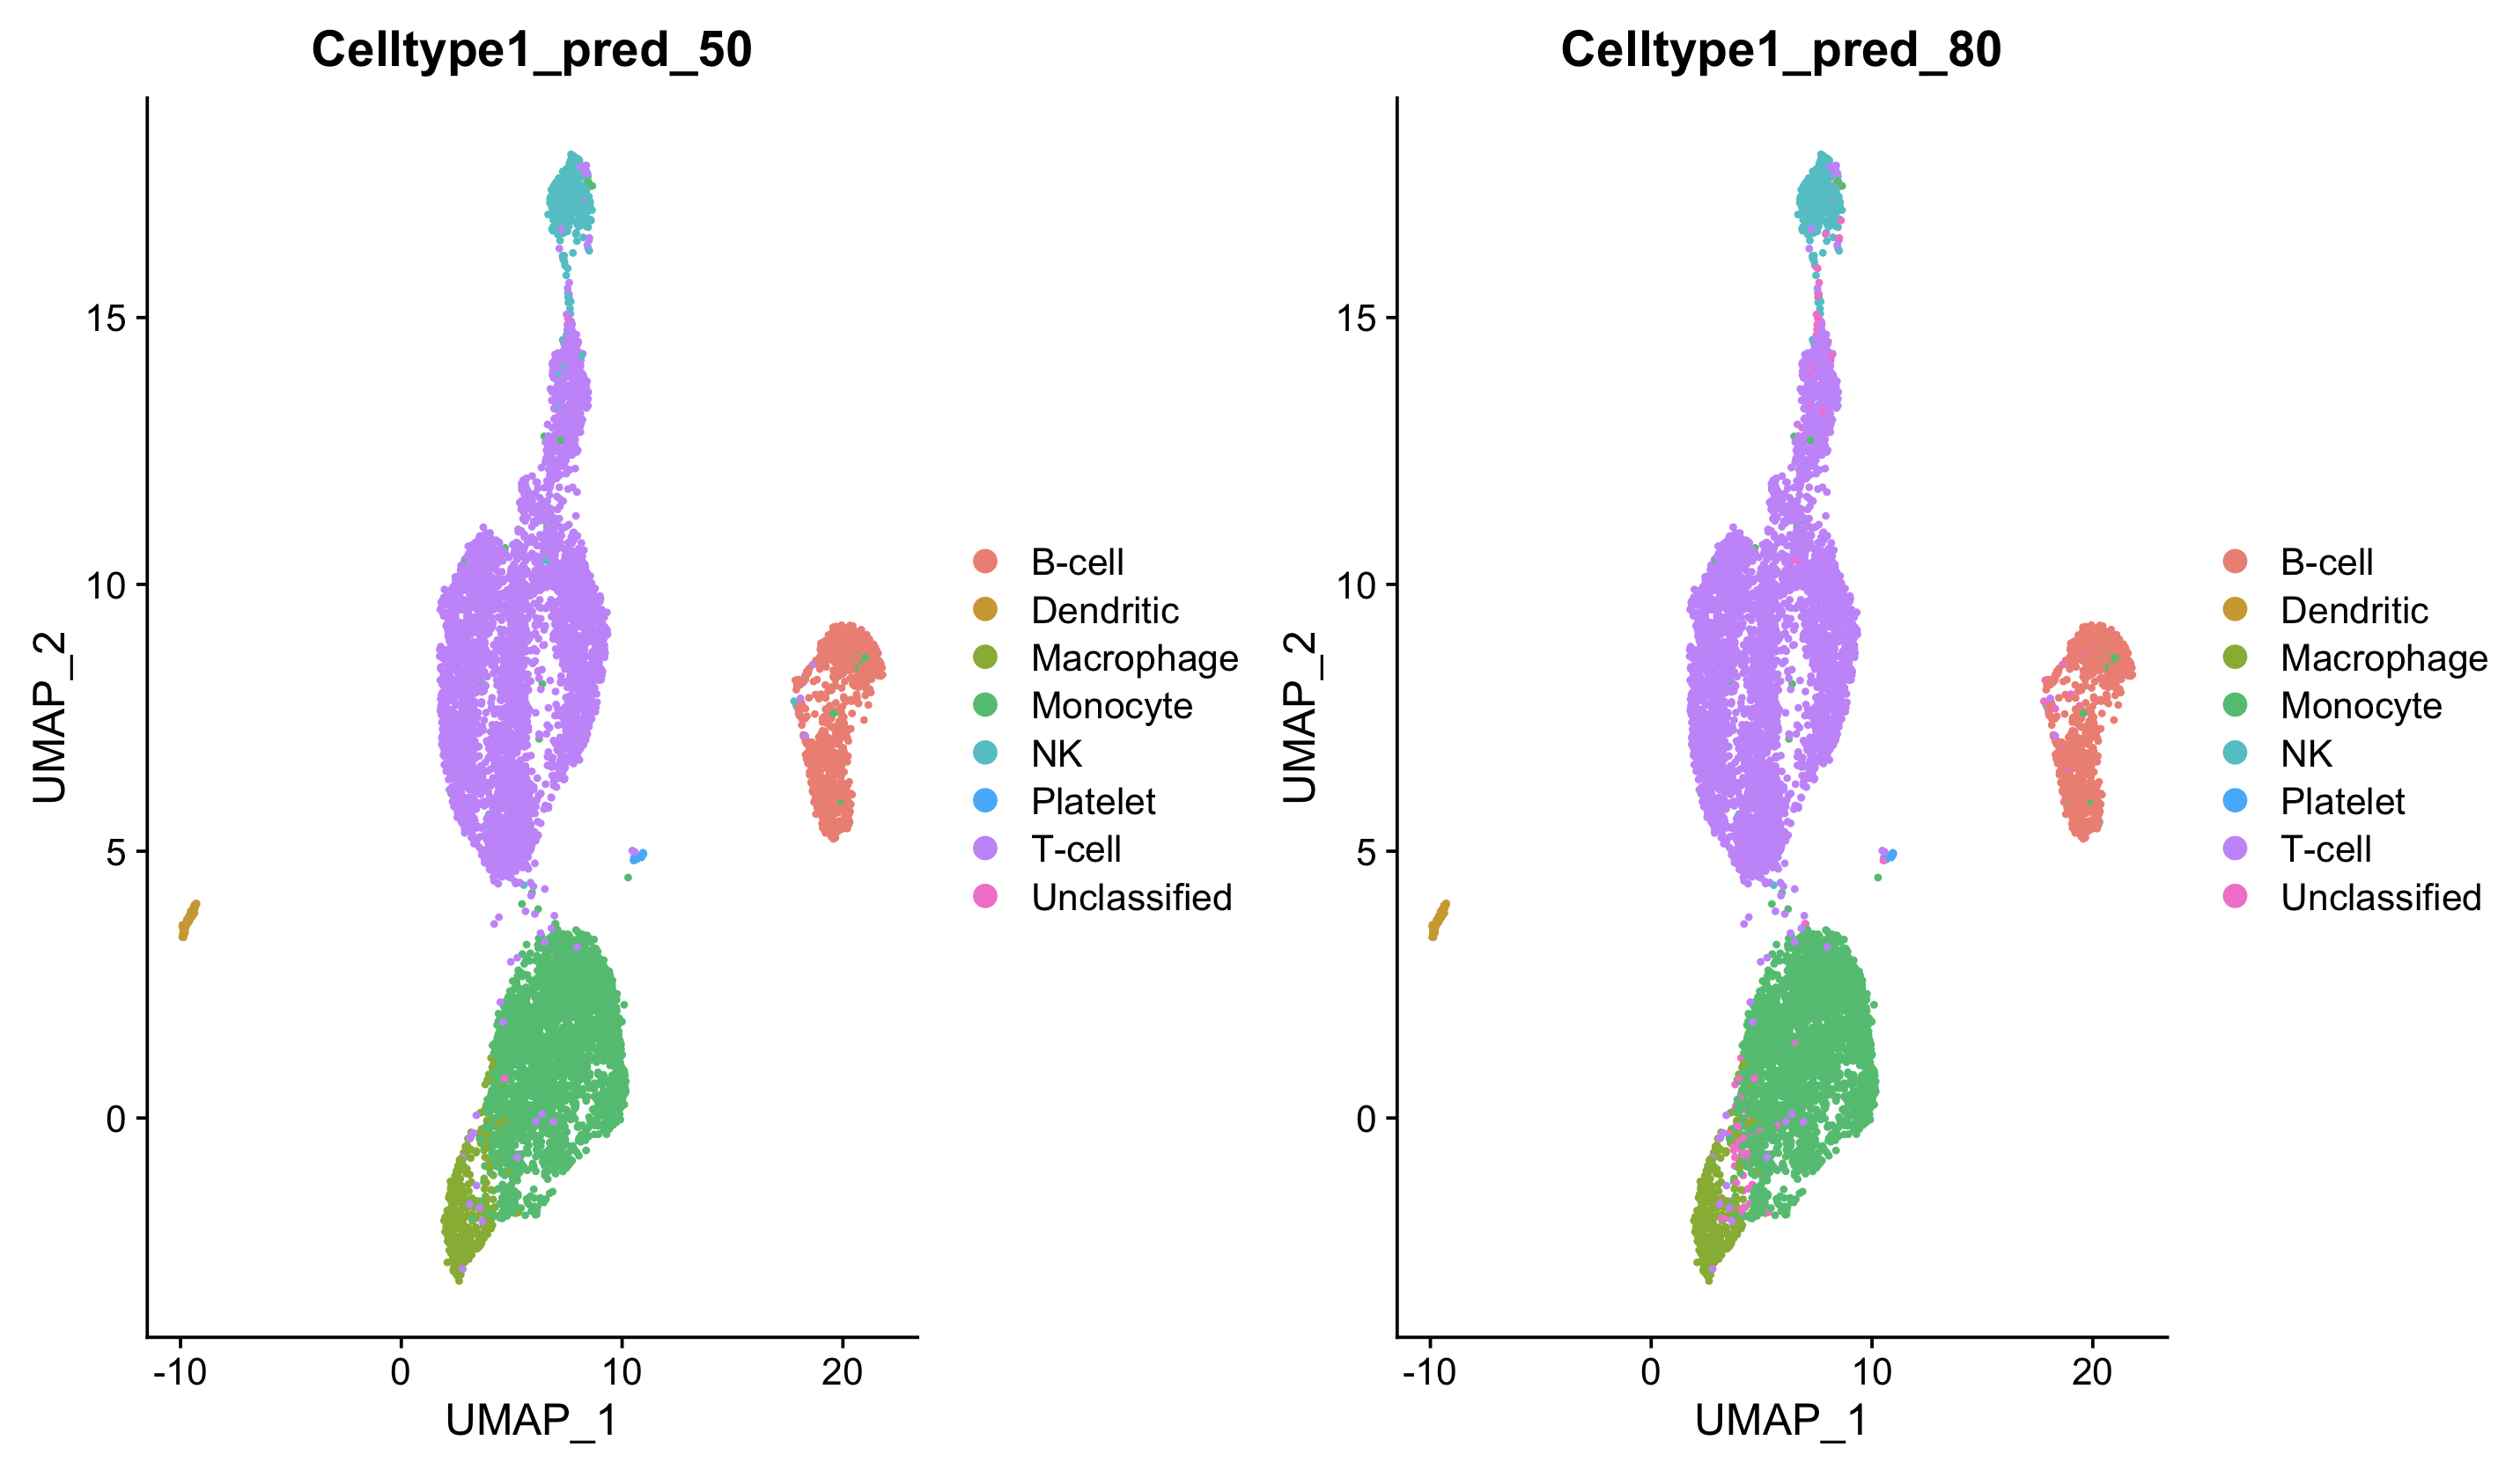

By increasing the threshold for the rejection cutoff in the prediction options, cell type predictions improve at the expense of throwing away cells with lower cell type probability. Here, we can see the increase in unclassified cells as the rejection cutoff is adjusted from 0.5 to 0.8.

In [ ]:
p1 = DimPlot(pbmc10k, group.by="Celltype2_pred_50", reduction = "umap", pt.size = 0.5)
p2 = DimPlot(pbmc10k, group.by="Celltype2_pred_80", reduction = "umap", pt.size = 0.5)
p1+p2

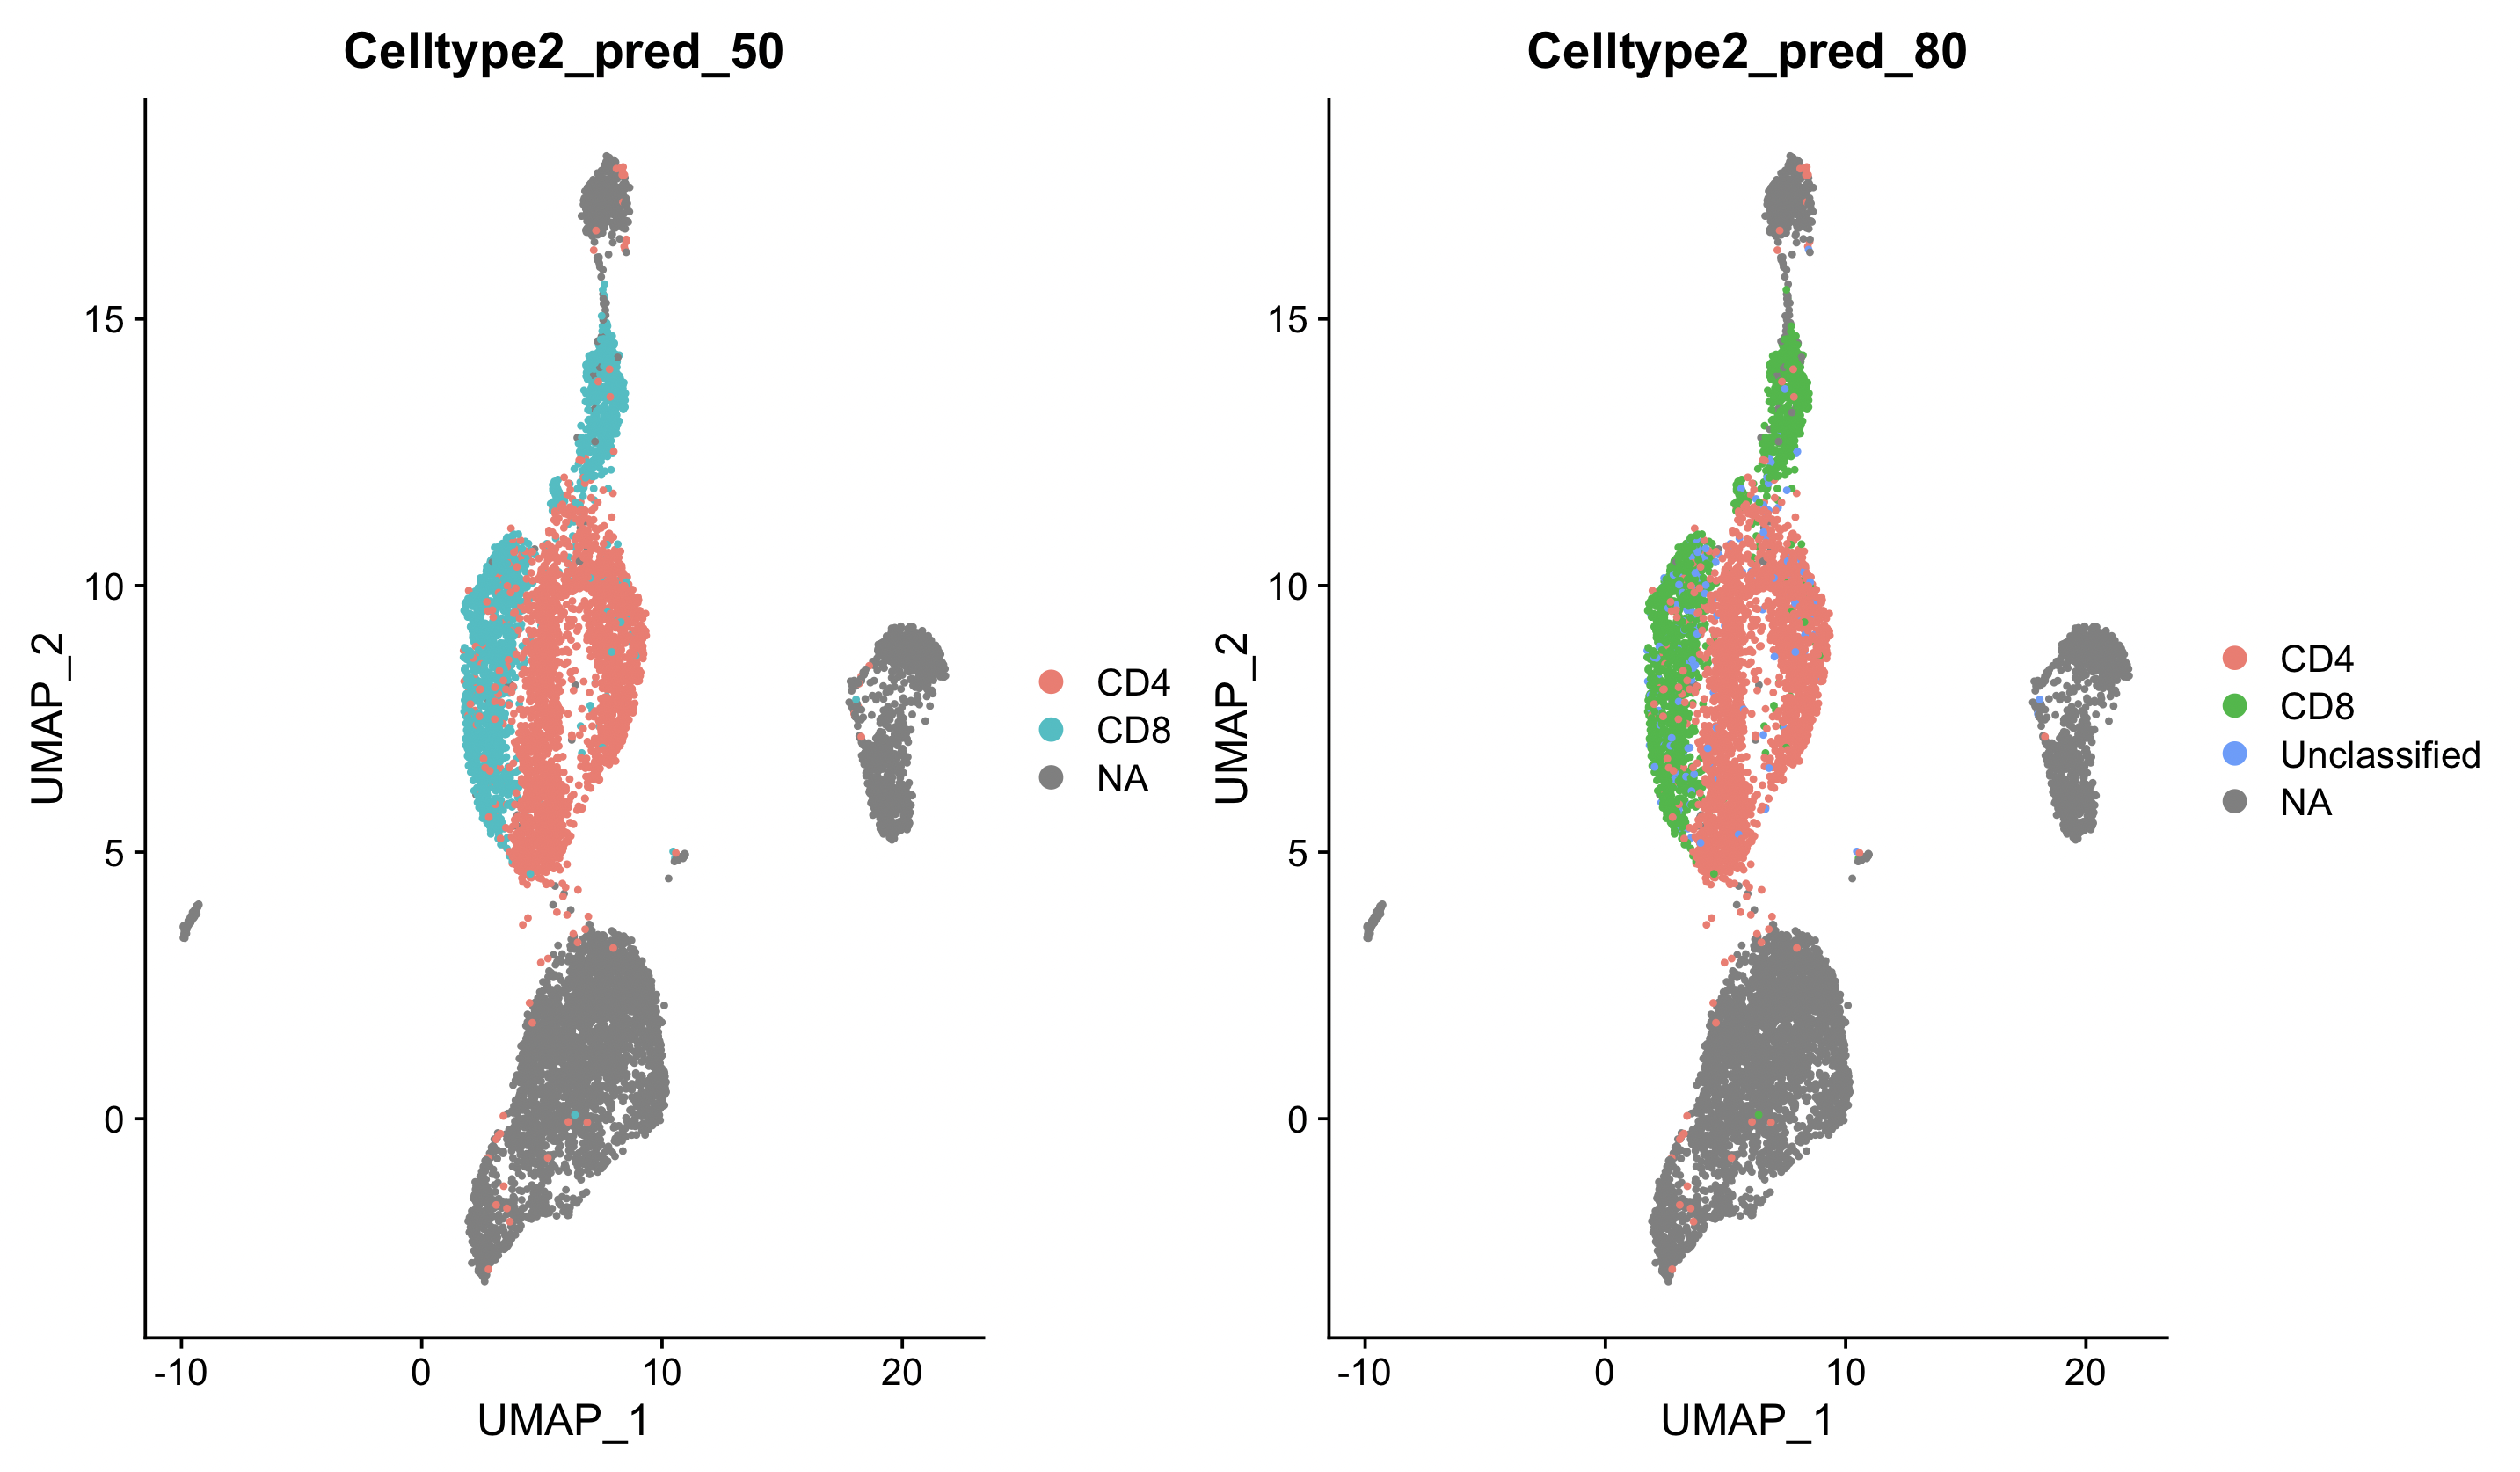

In [ ]:
p1 = DimPlot(pbmc10k, group.by="Celltype3_pred_50", reduction = "umap", pt.size = 0.5)
p2 = DimPlot(pbmc10k, group.by="Celltype3_pred_80", reduction = "umap", pt.size = 0.5)
p1+p2

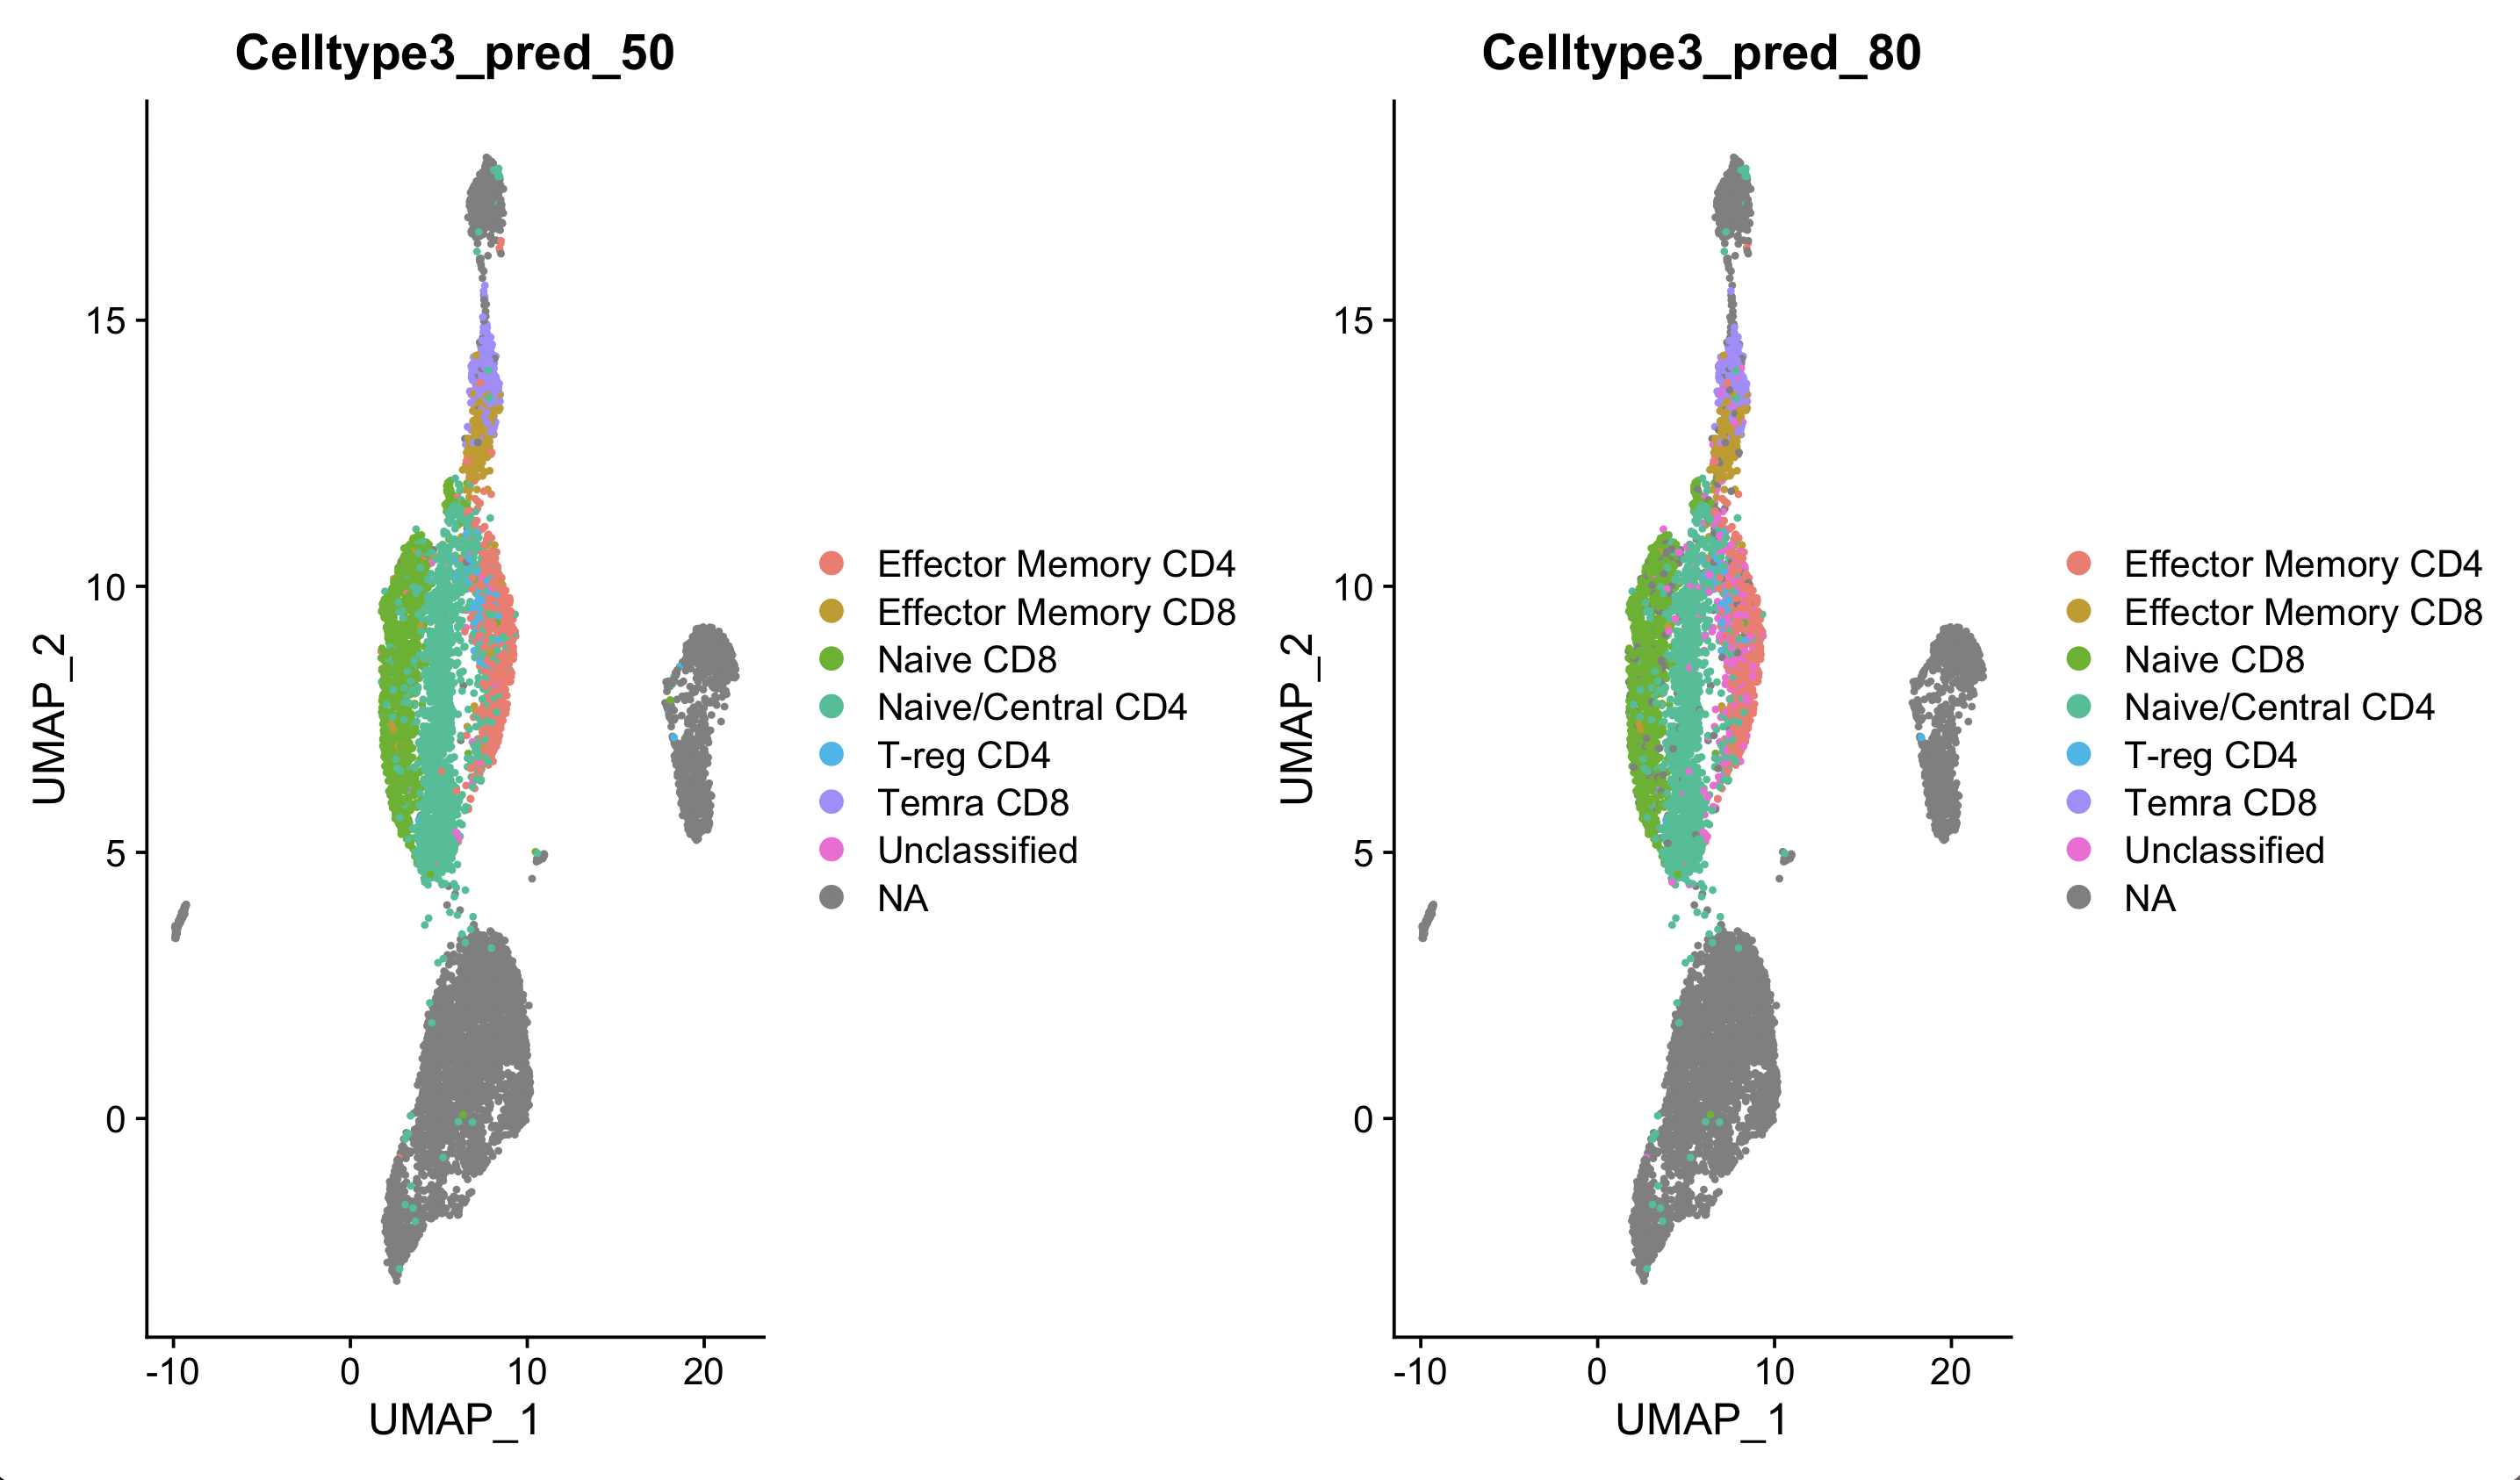

# Back to Table of Contents

[Table of Contents](tableofcontents.ipynb#toc)